# Artificial Neural Networks and Deep Learning

---

## Homework 1: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.
2. Upload the `training_set.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.zip` file to Codabench.


## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 1

Mounted at /gdrive
/gdrive/My Drive/[2024-2025] AN2DL/Homework 1


## ⚙️ Import Libraries

Install packets

In [ ]:
!pip install keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 25.1 MB/s eta 0:00:00


Import modules:

In [ ]:
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras.callbacks import LambdaCallback

import keras_cv
import logging
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns
import tensorflow as tf
import warnings

Setup configurations:

In [ ]:
# Set seed for reproducibility
seed = 42

random.seed(seed) # Set seeds for random number generators in Python
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed) # Set seed for TensorFlow

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(1)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

## ⏳ Load the Data

In [ ]:
data = np.load('training_set.npz')  # Load the training data here
X = data['images']
y = data['labels']

In [ ]:
labels = {
    0: 'Basophil',
    1: 'Eosinophil',
    2: ' Erythroblast',
    3: 'Immature granulocytes',
    4: 'Lymphocyte',
    5: 'Monocyte',
    6: 'Neutrophil',
    7: 'Platelet'
}

unique_labels = list(labels.values())

print('Labels:\n', unique_labels)

In [ ]:
# Define a function to display images
def display_images(
    X=X,
    y=y,
    labels=unique_labels,
    num_images=8
):
    random_indices = random.sample(range(len(X)), num_images)

    fig, axes = plt.subplots(2, num_images // 2, figsize=(20, 9))

    for i, idx in enumerate(random_indices):
        ax = axes[i // 4, i % 4]
        ax.imshow(X[idx])

        class_name = unique_labels[y[idx][0]]
        ax.set_title(class_name, pad=5)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
display_images(X, y)

In [ ]:
print(type(X))
print(X.shape)
print(X.ndim)
print(f'Class: {y[0]}')
plt.imshow(X[0])

## Inspect Data

In [ ]:
print(f'Dataset Shape: {X.shape}')
print(f'Labels Shape: {y.shape}')

Dataset Shape: (13759, 96, 96, 3)
Labels Shape: (13759, 1)


In [ ]:
print('Counting occurences of target classes:')
print(pd.DataFrame(y, columns=['digit'])['digit'].value_counts())

Counting occurences of target classes:
digit
6    2530
1    2381
3    2226
7    1843
5    1393
2    1285
0    1052
4    1049
Name: count, dtype: int64


[5]


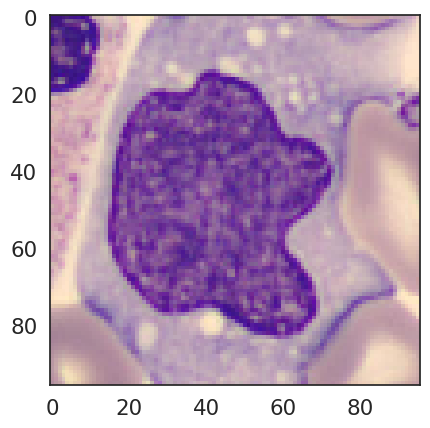

In [ ]:
plt.imshow(X[3025])
print(y[3025])

## Process Data

Eliminate duplicates:

In [ ]:
X_unique, idx, count = np.unique(X, return_index=True, return_counts=True, axis=0)
print(idx.shape)

index = [idx[i] for i in range(idx.shape[0]) if count[i] == 1]

X = X[index]
y = y[index]

print(f'Dataset (no duplicates) Shape: {X.shape}')
print(f'Dataset (no duplicates) Shape: {y.shape}')

plt.imshow(X[1])
print(y[1])

In [ ]:
print('Counting occurences of target classes:')
print(pd.DataFrame(y, columns=['digit'])['digit'].value_counts())

In [ ]:
display_images(X, y)

In [ ]:
# Convert labels to categorical format using one-hot encoding
y = tfk.utils.to_categorical(y)

In [ ]:
# Split the dataset into training set, validation set, and test set

# Get training-validation set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    random_state=seed,
    test_size=0.1,
    stratify=y)

# Get training set and validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    random_state=seed,
    test_size=len(y_test),
    stratify=y_train_val)

print(f'Training Set Shape: {X_train.shape}')
print(f'Training Labels Shape: {y_train.shape}\n')

print(f'Validation Set Shape: {X_val.shape}')
print(f'Validation Labels Shape: {y_val.shape}\n')

print(f'Test Set Shape: {X_test.shape}')
print(f'Test Labels Shape: {y_test.shape}')

In [ ]:
# Compare categorical label and "default" label representation

# Display the categorical label
print(f'Categorical Label: {y_train[0]}')
# Display the equivalent numeric label
print(f'"Default" Label: {np.argmax(y_train[0])}')

## Define Model Parameters

In [ ]:
input_shape = X.shape[1:]
output_shape = y.shape[-1]

print(f'Input Shape: {input_shape}')
print(f'Output Shape: {output_shape}')

In [ ]:
# Number of epochs
epochs = 150

# Batch Size
batch_size = 128

# Learning Rate
learning_rate = 0.001

print(f'Number of epochs: {epochs}')
print(f'Batch Size: {batch_size}')
print(f'Learning Rate: {learning_rate}')

## Transfer Learning

In [ ]:
model_pretrained = tfk.applications.ConvNeXtBase(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

In [ ]:
# Freeze all layers in the pretrained model
model_pretrained.trainable = False

# Create the input layer
inputs = tfk.Input(shape=input_shape, name='input_layer')

augmentation = tf.keras.Sequential(
    [
      tfkl.RandomFlip("horizontal_and_vertical"),
      tfkl.RandomRotation(factor=0.5, fill_mode='nearest'),
      tfkl.RandomZoom(height_factor=0.5, fill_mode='nearest'),
      tfkl.RandomBrightness(factor=0.9),
      tfkl.RandomContrast(factor=0.9),
      tfkl.GaussianNoise(0.9),
      keras_cv.layers.RandomColorDegeneration(0.9),
      keras_cv.layers.RandomHue(0.3, [0,255]),
      tfkl.RandomTranslation(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),

      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),

      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),

      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),

      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),

      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),

      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
      keras_cv.layers.RandomCutout(0.075, 0.075, fill_mode="gaussian_noise"),
    ], # they are 30
    name="preprocessing"
)

x = augmentation(inputs)
x = model_pretrained(x)

x = tfk.layers.Dense(512, activation='relu')(x)
x = tfk.layers.Dropout(0.3)(x)
x = tfk.layers.Dense(256, activation='relu')(x)
x = tfk.layers.Dropout(0.3)(x)

# Old layers
#x = tfkl.Dropout(0.25, name='dropout')(x)
#x = tfkl.Dense(units=512, activation='relu', name='dense1')(x)

outputs = tfkl.Dense(units=output_shape, activation='softmax', name='output_layer')(x)

# We create our model
model = tfk.Model(
    inputs=inputs,
    outputs=outputs,
    name='model'
)

model.compile(
    loss=tfk.losses.CategoricalCrossentropy(),
    optimizer=tfk.optimizers.Adam(learning_rate),
    metrics=['accuracy']
)

In [ ]:
# Pick 3 random images from x_train
random_indices = np.random.randint(0, len(X_train), size=3)
images = X_train[random_indices]  # Shape: (3, height, width, channels)

# Add a batch dimension for the augmentation pipeline
images_batch = tf.convert_to_tensor(images)  # Shape: (3, height, width, channels)

# Generate augmented images
augmented_images = augmentation(images_batch, training=True)

# Convert tensors to numpy arrays for visualization
original_images = images  # Already in NumPy format
augmented_images = augmented_images.numpy().astype("uint8")

# Plot the images
plt.figure(figsize=(12, 6))

# Show original images and augmented images side by side
for i in range(3):
    # Original images
    plt.subplot(2, 3, i+1)
    plt.title(f"Original Image {i+1}")
    plt.imshow(original_images[i])
    plt.axis("off")

    # Augmented images
    plt.subplot(2, 3, i+4)
    plt.title(f"Augmented Image {i+1}")
    plt.imshow(augmented_images[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

## Define Early Stopping Callback

In [ ]:
"""# We set up after how many epochs without improvements
# on the validation accuracy we want to stop
patience = 10

early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True
)

callbacks = [early_stopping]"""

"# We set up after how many epochs without improvements\n# on the validation accuracy we want to stop\npatience = 10\n\nearly_stopping = tfk.callbacks.EarlyStopping(\n    monitor='val_accuracy',\n    mode='max',\n    patience=patience,\n    restore_best_weights=True\n)\n\ncallbacks = [early_stopping]"

## 🛠️ Train and Save the Model

In [ ]:
"""# We train the model and store informations about this training
# in the history variable
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks
).history

# Compute and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy'])*100, 2)
print(f'Final Validation Accuracy: {final_val_accuracy}')

model.save('weights.keras')
del model"""

"# We train the model and store informations about this training\n# in the history variable\nhistory = model.fit(\n    x=X_train,\n    y=y_train,\n    batch_size=batch_size,\n    epochs=epochs,\n    validation_data=(X_val, y_val),\n    callbacks=callbacks\n).history\n\n# Compute and print the final validation accuracy\nfinal_val_accuracy = round(max(history['val_accuracy'])*100, 2)\nprint(f'Final Validation Accuracy: {final_val_accuracy}')\n\nmodel.save('weights.keras')\ndel model"

In [ ]:
"""# Plot training and validation loss
plt.figure(figsize=(15, 2))
plt.plot(history['loss'], label='Training Loss', alpha=0.8)
plt.plot(history['val_loss'], label='Validation Loss', alpha=0.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=0.3)

# Plot training and validation accuracy
plt.figure(figsize=(15, 2))
plt.plot(history['accuracy'], label='Training Accuracy', alpha=0.8)
plt.plot(history['val_accuracy'], label='Validation Accuracy', alpha=0.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=0.3)

plt.show()"""

"# Plot training and validation loss\nplt.figure(figsize=(15, 2))\nplt.plot(history['loss'], label='Training Loss', alpha=0.8)\nplt.plot(history['val_loss'], label='Validation Loss', alpha=0.8)\nplt.title('Loss')\nplt.legend()\nplt.grid(alpha=0.3)\n\n# Plot training and validation accuracy\nplt.figure(figsize=(15, 2))\nplt.plot(history['accuracy'], label='Training Accuracy', alpha=0.8)\nplt.plot(history['val_accuracy'], label='Validation Accuracy', alpha=0.8)\nplt.title('Accuracy')\nplt.legend()\nplt.grid(alpha=0.3)\n\nplt.show()"

## Fine Tuning

In [ ]:
# Load the model
#model = tfk.models.load_model('weights.keras')

# Display a summary of the model architecture
#model.summary(expand_nested=True)

# Plot the model architecture with trainable parameters and layer shapes
#tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
"""# Set the ConvNeXtBase model layers as trainable
model.get_layer('convnext_base').trainable = True

# Set all ConvNeXtBase model layers as non-trainable
for layer in model.get_layer('convnext_base').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(model.get_layer('convnext_base').layers):
  if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
      layer.trainable = True
      print(i, layer.name, type(layer).__name__, layer.trainable)"""

"# Set the ConvNeXtBase model layers as trainable\nmodel.get_layer('convnext_base').trainable = True\n\n# Set all ConvNeXtBase model layers as non-trainable\nfor layer in model.get_layer('convnext_base').layers:\n    layer.trainable = False\n\n# Enable training only for Conv2D and DepthwiseConv2D layers\nfor i, layer in enumerate(model.get_layer('convnext_base').layers):\n  if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):\n      layer.trainable = True\n      print(i, layer.name, type(layer).__name__, layer.trainable)"

In [ ]:
"""# Set the number of layers to freeze
N = 124

# Set the first N layers as non-trainable
for i, layer in enumerate(model.get_layer('convnext_base').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(model.get_layer('convnext_base').layers):
    print(i, layer.name, layer.trainable)"""

"# Set the number of layers to freeze\nN = 124\n\n# Set the first N layers as non-trainable\nfor i, layer in enumerate(model.get_layer('convnext_base').layers[:N]):\n    layer.trainable = False\n\n# Print layer indices, names, and trainability status\nfor i, layer in enumerate(model.get_layer('convnext_base').layers):\n    print(i, layer.name, layer.trainable)"

In [ ]:
fine_tune_from = 220
model_name_pretrained = 'convnext_base'

model.get_layer(model_name_pretrained).trainable = True

# Sblocca i layer convoluzionali dal layer `fine_tune_from` in poi
for i, layer in enumerate(model.get_layer(model_name_pretrained).layers):
    layer.trainable = False
    if i > fine_tune_from:
      if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
          layer.trainable = True

In [ ]:
# Compile the model
model.compile(
    loss=tfk.losses.CategoricalCrossentropy(),
    #optimizer=tfk.optimizers.Adam(1e-4),
    optimizer=tfk.optimizers.Lion(learning_rate=1e-4),
    metrics=['accuracy']
)

In [ ]:
# Again we set up the early stopping
patience = 10

# Callback
save_every_10 = LambdaCallback(
    on_epoch_end=lambda epoch, logs:
    model.save(f'model_epoch_{epoch + 1}.keras') if (epoch + 1) % 10 == 0 else None
)

early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True
)

callbacks = [save_every_10, early_stopping]

In [ ]:
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_val, y_val),
    callbacks=callbacks
).history

# Compute and print the Final Validation Accuracy"
final_val_accuracy = round(max(history['val_accuracy'])*100, 2)
print(f'Final Validation Accuracy: {final_val_accuracy}%')

model.save('/gdrive/My Drive/[2024-2025] AN2DL/Homework 1/weights.keras')
model.save('weights.keras')

del model

Epoch 1/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.2161 - loss: 2.2069 - val_accuracy: 0.5498 - val_loss: 1.2407
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.3835 - loss: 1.6554 - val_accuracy: 0.6519 - val_loss: 0.9693
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.4520 - loss: 1.4751 - val_accuracy: 0.7021 - val_loss: 0.8681
Epoch 4/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.4946 - loss: 1.3536 - val_accuracy: 0.7322 - val_loss: 0.7665
Epoch 5/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5309 - loss: 1.2840 - val_accuracy: 0.7523 - val_loss: 0.6868
Epoch 6/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.5368 - loss: 1.2352 - val_accuracy: 0.7782 - val_loss: 0.6497
Epoch 7/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.5534 - loss: 1.2196 - val_accuracy: 0.8059 - val_loss: 0.5861
Epoch 8/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.5704 - loss: 1.1675 - val_accuracy: 0.

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(15, 2))
plt.plot(history['loss'], label='Training Loss', alpha=0.8)
plt.plot(history['val_loss'], label='Validation Loss', alpha=0.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=0.3)

# Plot training and validation accuracy
plt.figure(figsize=(15, 2))
plt.plot(history['accuracy'], label='Training Accuracy', alpha=0.8)
plt.plot(history['val_accuracy'], label='Validation Accuracy', alpha=0.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=0.3)

plt.show()

## Use the Model - Make Inference

In [ ]:
"""# Load the model
model = tfk.models.load_model('weights.keras')

#model.summary(expand_nested=True)

#tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)"""

In [ ]:
"""# Predict labels for the test set
predictions = model.predict(X_test, verbose=0)

# Display the shape for the predictions
print(f'Predictions Shape: {predictions.shape}')"""

In [ ]:
"""# Convert predictions to class labels
pred_classes = np.argmax(predictions, axis=-1)

# Extract ground truth classes
true_classes = np.argmax(y_test, axis=-1)

# Compute and display test set accuracy
accuracy = accuracy_score(true_classes, pred_classes)
print(f'Accuracy score over the test set: {round(accuracy, 4)}')

# Compute and display test set precision
precision = precision_score(true_classes, pred_classes, average='weighted')
print(f'Precision score over the test set: {round(precision, 4)}')

# Compute and display test set recall
recall = recall_score(true_classes, pred_classes, average='weighted')
print(f'Recall score over the test set: {round(recall, 4)}')

# Compute and display test set
f1 = f1_score(true_classes, pred_classes, average='weighted')
print(f'F1 score over the test set: {round(f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Combine numbers and percentages into a string for annotation
annot = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

plt.figure(figsize=(10, 8))
sns.heatmap(cm.T, annot=annot, fmt='', xticklabels=list(labels.values()), yticklabels=list(labels.values()), cmap='Blues')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()"""

## 📊 Prepare Your Submission

To prepare your submission, create a `.zip` file that includes all the necessary code to run your model. It **must** include a `model.py` file with the following class:

```python
# file: model.py
class Model:
    def __init__(self):
        """Initialize the internal state of the model."""

    def predict(self, X):
        """Return a numpy array with the labels corresponding to the input X."""
```

The next cell shows an example implementation of the `model.py` file, which includes loading model weights from the `weights.keras` file and conducting predictions on provided input data. The `.zip` file is created and downloaded in the last notebook cell.

❗ Feel free to modify the method implementations to better fit your specific requirements, but please ensure that the class name and method interfaces remain unchanged.

In [ ]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('weights.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

In [ ]:
#model.save('/gdrive/My Drive/[2024-2025] AN2DL/Homework 1')

from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
!zip {filename} model.py weights.keras

from google.colab import files
files.download(filename)